Planetary Nebulae Project

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
from scipy.fft import fft, fftfreq
import matplotlib.patches as mpatches
from astropy.io import fits
import astropy.units as u
from astropy.coordinates import SkyCoord
import io

Database Set-Ups

In [3]:
# PNE Hash (Galactic) Database -------------------------------------------------
dtype = [('idPNMain', 'i4'),('PNG', 'U10'),('Name', 'U10'),('PNstat', 'U1'),('RAJ2000', 'U12'),('DECJ2000', 'U12'),('DRAJ2000', 'f8'),('DDECJ2000', 'f8'),('Glon', 'f8'),('Glat', 'f8'),('MajDiam', 'f8'),('mainClass', 'U1'),('subClass', 'U1')]
data1 = np.genfromtxt('Resources/all_true_galactic_PNe.csv', delimiter=',',dtype=dtype,names=True)

go1 = data1['Glon']
ga1 = data1['Glat']
glon1 = go1 * u.deg
glat1 = ga1 * u.deg

g_coords1 = SkyCoord(l=glon1,b=glat1, frame='galactic')

In [4]:
# PNe Hash (All) Database ---------------------------------------------------------
dtype = [('idPNMain', 'i4'),('PNG', 'U10'),('Name', 'U10'),('PNstat', 'U1'),('RAJ2000', 'U12'),('DECJ2000', 'U12'),('DRAJ2000', 'f8'),('DDECJ2000', 'f8'),('Glon', 'f8'),('Glat', 'f8'),('MajDiam', 'f8'),('mainClass', 'U1'),('subClass', 'U1')]
data2 = np.genfromtxt('Resources/all_true_all_PNe.csv', delimiter=',',dtype=dtype,names=True)

go2 = data2['Glon']
ga2 = data2['Glat']
glon2 = go2 * u.deg
glat2 = ga2 * u.deg

g_coords2 = SkyCoord(l=glon2,b=glat2, frame='galactic')

In [5]:
# Fermi Database (Gamma-Ray) ---------------------------------------------------
hdul = fits.open('Resources/gll_psc_v35.fit')
data = hdul[1].data

o3 = [row[4] for row in data]
a3 = [row[5] for row in data]

go3 = [float(value) for value in o3]
ga3 = [float(value) for value in a3]

glon3 = go3 * u.deg
glat3 = ga3 * u.deg

g_coords3 = SkyCoord(l=glon3,b=glat3, frame='galactic')

In [7]:
# Chandra Database (X-Ray) -----------------------------------------------------
dtypee = [('blank', 'f8'),('name', 'U20'), ('ra', 'U15'), ('dec', 'U15'), ('lii', 'f8'), ('bii', 'f8'), ('error_ellipse_r0', 'f8'), ('error_ellipse_r1', 'f8'), ('error_ellipse_angle', 'f8')]
data4 = np.genfromtxt('Resources/chandra.txt', delimiter='|', skip_header=3, dtype=dtypee, invalid_raise=False)

go4 = data4['lii']
ga4 = data4['bii']
glon4 = go4 * u.deg
glat4 = ga4 * u.deg

g_coords4 = SkyCoord(l=glon4,b=glat4, frame='galactic')

In [8]:
# Swift Database (Ultraviolet & Optical) ---------------------------------------
dtypeee = [('blank', 'f8'),('source_number', 'i8'), ('name', 'U25'), ('ra', 'U15'), ('dec', 'U15'), ('lii', 'f8'), ('bii', 'f8'), ('error_radius', 'f8'), ('count_rate_fb', 'f8'), ('count_rate_fb_pos_err', 'f8'), ('count_rate_fb_neg_err', 'f8'), ('pow_flux_a', 'f8'), ('pow_flux_a_pos_err', 'f8'), ('pow_flux_a_neg_err', 'f8'), ('apec_flux_a', 'f8'), ('apec_flux_a_pos_err', 'f8'), ('apec_flux_a_neg_err', 'f8')]
data5 = np.genfromtxt('Resources/swift.txt', delimiter='|', skip_header=3, dtype=dtypeee, invalid_raise=False)

go5 = data5['lii']
ga5 = data5['bii']

glon5 = go5 * u.deg
glat5 = ga5 * u.deg

g_coords5 = SkyCoord(l=glon5,b=glat5, frame='galactic')

Plotting onto Hammer Projections

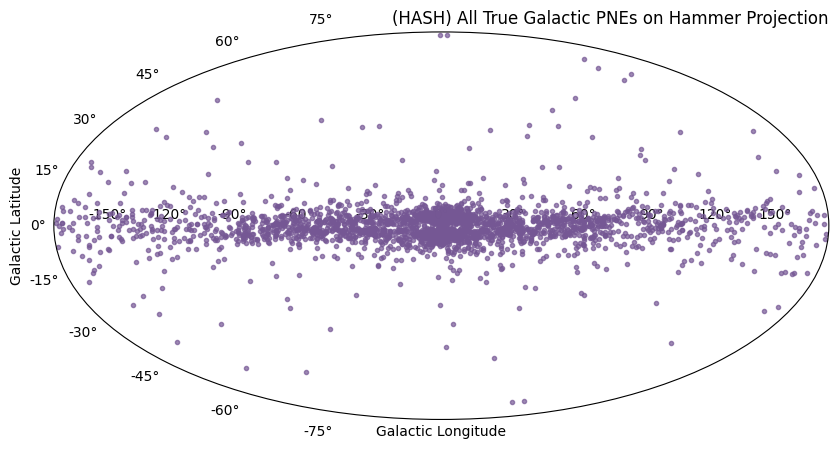

In [7]:
# Plotting Galactic PNe ----------------------------------------------------
fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords1.l.wrap_at(180*u.deg).to(u.radian), g_coords1.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#755794')
a.set_title("(HASH) All True Galactic PNEs on Hammer Projection",loc='right')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
plt.show()

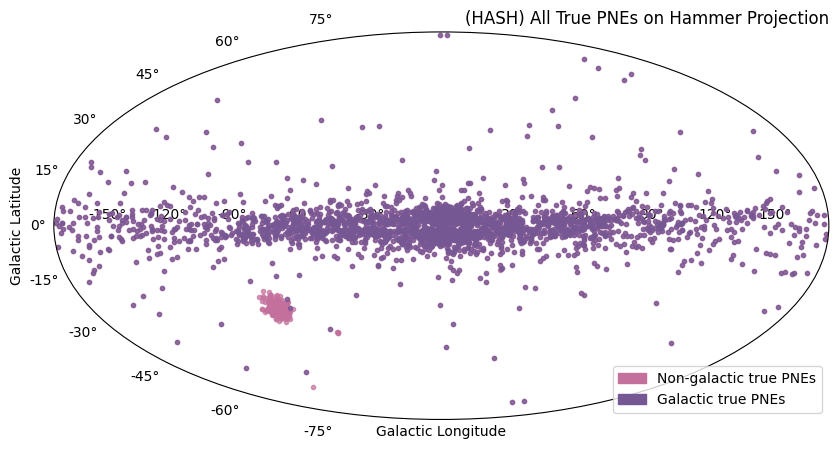

In [6]:
# Plotting All PNe -------------------------------------------------------------
fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords2.l.wrap_at(180*u.deg).to(u.radian), g_coords2.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#c4709c')
a.plot(g_coords1.l.wrap_at(180*u.deg).to(u.radian), g_coords1.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#755794')

a.set_title("(HASH) All True PNEs on Hammer Projection",loc='right')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
pink_patch = mpatches.Patch(color='#c4709c', label='Non-galactic true PNEs')
purple_patch = mpatches.Patch(color='#755794', label='Galactic true PNEs')
handles = [pink_patch,purple_patch]
plt.legend(handles=handles, loc='lower right')
plt.show()

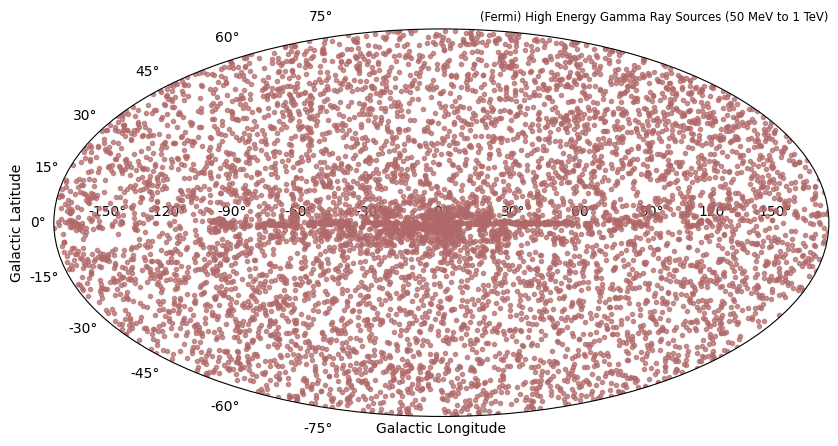

In [9]:
# Plotting Fermi ---------------------------------------------------------------
fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords3.l.wrap_at(180*u.deg).to(u.radian), g_coords3.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#b06868')

a.set_title("(Fermi) High Energy Gamma Ray Sources (50 MeV to 1 TeV)",loc='right',size='small')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
plt.show()

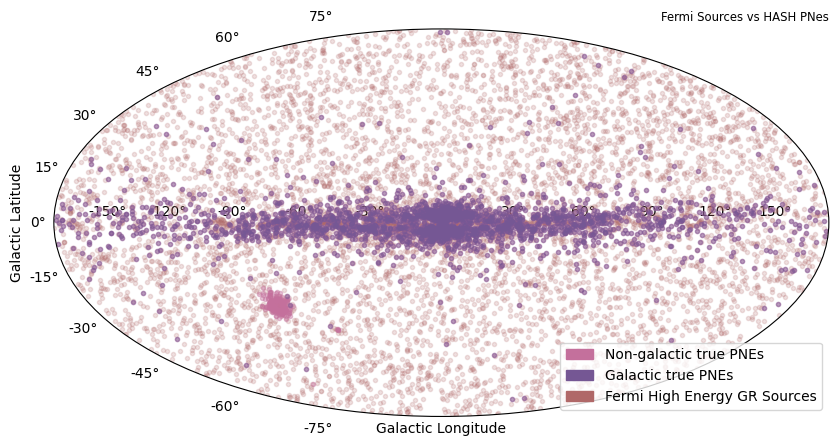

In [10]:
# Plotting PNe vs Fermi --------------------------------------------------------
fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords3.l.wrap_at(180*u.deg).to(u.radian), g_coords3.b.to(u.radian),'o',markersize=3, alpha=0.2,color='#b06868')
a.plot(g_coords2.l.wrap_at(180*u.deg).to(u.radian), g_coords2.b.to(u.radian),'o',markersize=3, alpha=0.4,color='#c4709c')
a.plot(g_coords1.l.wrap_at(180*u.deg).to(u.radian), g_coords1.b.to(u.radian),'o',markersize=3, alpha=0.4,color='#755794')

a.set_title("Fermi Sources vs HASH PNes",loc='right',size='small')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
pink_patch = mpatches.Patch(color='#c4709c', label='Non-galactic true PNEs')
purple_patch = mpatches.Patch(color='#755794', label='Galactic true PNEs')
red_patch = mpatches.Patch(color='#b06868', label='Fermi High Energy GR Sources')
handles = [pink_patch,purple_patch, red_patch]
plt.legend(handles=handles, loc='lower right')
plt.show()

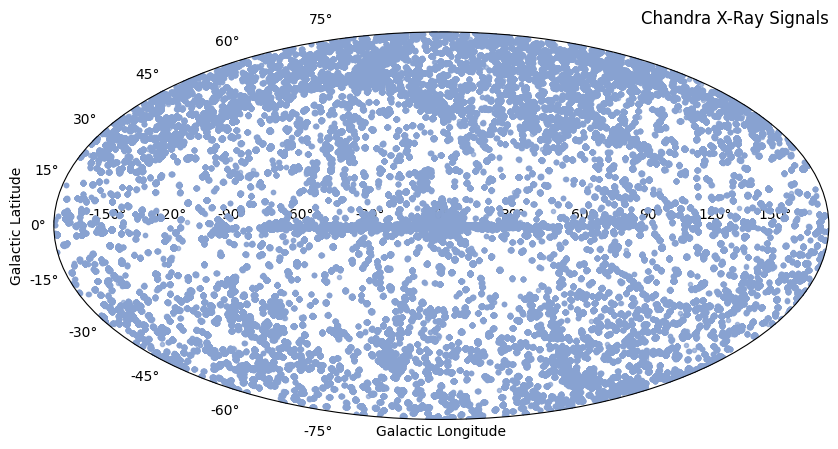

In [11]:
# Plotting Swift ---------------------------------------------------------------
fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords4.l.wrap_at(180*u.deg).to(u.radian), g_coords4.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#88a2d1')
a.set_title("Chandra X-Ray Signals",loc='right')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
plt.show()

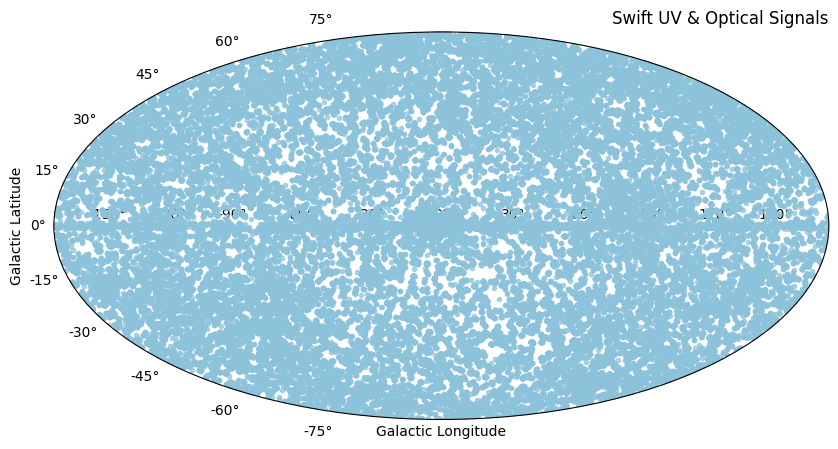

In [12]:
# Plotting Swift ---------------------------------------------------------------
fig = plt.figure(figsize=(10,15))
a = fig.add_subplot(111,projection='hammer')
a.plot(g_coords5.l.wrap_at(180*u.deg).to(u.radian), g_coords5.b.to(u.radian),'o',markersize=3, alpha=0.7,color='#8dc2db')
a.set_title("Swift UV & Optical Signals",loc='right')
a.set_xlabel("Galactic Longitude")
a.set_ylabel("Galactic Latitude")
plt.show()

In [13]:
################################################################################
#                                 Fermi Matrix                                 #
################################################################################

# Matrix of Distances -------------------------------------------------------------
distances = np.zeros((len(g_coords2), len(g_coords3)))
distances = g_coords2[:, None].separation(g_coords3[None, :]).deg
print(distances)

[[ 64.89784621  98.62253864 106.32682975 ...  72.10450497  77.46357588
  108.5740595 ]
 [ 61.92495006  95.37707494 103.85018898 ...  68.3081313   73.49911024
  106.4366324 ]
 [ 57.37175176  90.37515846  99.99879385 ...  62.39729672  67.33000174
  103.08663076]
 ...
 [ 95.77942249  73.34291187  71.5672551  ...  88.30653268  84.20018051
   71.18487426]
 [ 19.44887351  93.79052754 110.90819665 ...  38.28476435  50.36923681
  116.94000364]
 [ 51.58637712 129.16554364 145.21822828 ...  73.58917716  86.09050221
  150.57138976]]


In [14]:
# Closest PNe to Each Fermi Signal -----------------------------------------------
min_distances = {}

for col_index in range(distances.shape[1]):
    column = distances[:, col_index]
    min_row_index = np.argmin(column)
    min_distance = column[min_row_index]
    nearest_coord = g_coords2[min_row_index]
    min_distances[col_index] = (nearest_coord, min_distance)

for col_index, (coord, dist) in min_distances.items():
    print(f"PNe Coordinate: ({coord.l.value}º,{coord.b.value}º), Minimum Distance: {dist}º")

"""
for column in distances.T:
  min = column.min()
  list.append(min)
list = [float(value) for value in list]
print(list)
print(np.min(list))
"""

PNe Coordinate: (303.0471º,-44.67687º), Minimum Distance: 3.8914431651803074º
PNe Coordinate: (118.86345º,-74.70908º), Minimum Distance: 22.755278267274324º
PNe Coordinate: (104.20757º,-29.64162º), Minimum Distance: 7.39023993690914º
PNe Coordinate: (115.993º,-13.5309º), Minimum Distance: 1.8742084067024258º
PNe Coordinate: (108.37097º,-76.18578º), Minimum Distance: 10.637720474826596º
PNe Coordinate: (108.37097º,-76.18578º), Minimum Distance: 16.18524577873998º
PNe Coordinate: (104.20757º,-29.64162º), Minimum Distance: 10.89534487679477º
PNe Coordinate: (104.20757º,-29.64162º), Minimum Distance: 7.093604274536946º
PNe Coordinate: (2.71149º,-52.44003º), Minimum Distance: 23.168000742847486º
PNe Coordinate: (108.37097º,-76.18578º), Minimum Distance: 11.731052428991244º
PNe Coordinate: (303.0471º,-44.67687º), Minimum Distance: 6.4424220801230785º
PNe Coordinate: (119.28001º,4.69828º), Minimum Distance: 1.0994963633261454º
PNe Coordinate: (108.37097º,-76.18578º), Minimum Distance: 10.1475

'\nfor column in distances.T:\n  min = column.min()\n  list.append(min)\nlist = [float(value) for value in list]\nprint(list)\nprint(np.min(list))\n'

In [15]:
################################################################################
#                                Chandra Matrix                                #
################################################################################

# Matrix of Distances -------------------------------------------------------------
chunksize4 = 50000
dc = []

for i in range(0, len(g_coords4), chunksize4):
    gc4_chunk = g_coords4[i:i + chunksize4]
    dc_chunk = g_coords2[:, None].separation(gc4_chunk[None, :]).deg
    dc.append(dc_chunk)
    print(f"Processed chunk {i // chunksize4 + 1}")

dc = np.concatenate(dc, axis=1)

Processed chunk 1
Processed chunk 2
Processed chunk 3
Processed chunk 4
Processed chunk 5
Processed chunk 6
Processed chunk 7
Processed chunk 8
Processed chunk 9


In [16]:
# Closest Chandra Signal to each PNe ---------------------------------------------
for row_index in range(dc.shape[0]):
    row = dc[row_index]
    min_col_index = np.argmin(row)
    min_distance = row[min_col_index]
    pne_name = data2['Name'][row_index]
    pne_coord = g_coords2[row_index]
    print(f"PNe Name: {pne_name}, Coordinate: ({pne_coord.l.value}º, {pne_coord.b.value}º), Closest Chandra Distance: {min_distance}º")

PNe Name: "K 6-4", Coordinate: (0.03035º, 2.0662º), Closest Chandra Distance: 0.07400761083175343º
PNe Name: "JaSt 93", Coordinate: (0.10451º, -1.91213º), Closest Chandra Distance: 0.03873405043003416º
PNe Name: "SB 1", Coordinate: (0.11982º, -8.09701º), Closest Chandra Distance: 1.288297344045745º
PNe Name: "M 3-43", Coordinate: (0.12383º, -1.14515º), Closest Chandra Distance: 0.01949572595271861º
PNe Name: "Al 2-J", Coordinate: (0.13036º, 2.68778º), Closest Chandra Distance: 0.68826107312094º
PNe Name: "H 2-40", Coordinate: (0.15423º, -5.61605º), Closest Chandra Distance: 0.32147301679605683º
PNe Name: "PC 12", Coordinate: (0.16601º, 17.24877º), Closest Chandra Distance: 4.9282671043339645º
PNe Name: "JaSt 69", Coordinate: (0.18622º, -1.04734º), Closest Chandra Distance: 0.01763448935309227º
PNe Name: "H 1-16", Coordinate: (0.19046º, 4.3735º), Closest Chandra Distance: 0.9318295270279574º
PNe Name: "Bl 3-10", Coordinate: (0.20472º, -2.34217º), Closest Chandra Distance: 0.019296396727

In [ ]:
################################################################################
#                              Swift Matrix                                    #
################################################################################

# Matrix of Distances -------------------------------------------------------------
chunksize5 = 50000
ds = []

for i in range(0, len(g_coords5), chunksize5):
    gc5_chunk = g_coords5[i:i + chunksize5]
    ds_chunk = g_coords2[:, None].separation(gc5_chunk[None, :]).deg
    ds.append(ds_chunk)
    print(f"Processed chunk {i // chunksize5 + 1}")

ds = np.concatenate(ds, axis=1)

Processed chunk 1
Processed chunk 2
Processed chunk 3


In [ ]:
# Closest Swift Signal to each PNe ---------------------------------------------
for row_index in range(ds.shape[0]):
    row = ds[row_index]
    min_col_index = np.argmin(row)
    min_distance = row[min_col_index]
    pne_name = data2['Name'][row_index]
    pne_coord = g_coords2[row_index]
    print(f"PNe Name: {pne_name}, Coordinate: ({pne_coord.l.value}º, {pne_coord.b.value}º), Closest Swift Distance: {min_distance}º")

PNe Name: "K 6-4", Coordinate: (0.03035º, 2.0662º), Closest Swift Distance: 0.07346950558694874º
PNe Name: "JaSt 93", Coordinate: (0.10451º, -1.91213º), Closest Swift Distance: 0.22656611000118923º
PNe Name: "SB 1", Coordinate: (0.11982º, -8.09701º), Closest Swift Distance: 0.21984623325747954º
PNe Name: "M 3-43", Coordinate: (0.12383º, -1.14515º), Closest Swift Distance: 0.011136240559631787º
PNe Name: "Al 2-J", Coordinate: (0.13036º, 2.68778º), Closest Swift Distance: 0.23101219017099092º
PNe Name: "H 2-40", Coordinate: (0.15423º, -5.61605º), Closest Swift Distance: 1.0486548460651401º
PNe Name: "PC 12", Coordinate: (0.16601º, 17.24877º), Closest Swift Distance: 1.2111200752570062º
PNe Name: "JaSt 69", Coordinate: (0.18622º, -1.04734º), Closest Swift Distance: 0.03002236073910038º
PNe Name: "H 1-16", Coordinate: (0.19046º, 4.3735º), Closest Swift Distance: 0.7282741823683905º
PNe Name: "Bl 3-10", Coordinate: (0.20472º, -2.34217º), Closest Swift Distance: 0.1716657263405562º
PNe Name:

In [ ]:
# Closest PNe to each Swift Signal (Unnecessary-Ignore) -------------------------------

min_ds = {}

for col_index in range(ds.shape[1]):
    column = ds[:, col_index]
    min_ri_ds = np.argmin(column)
    min_d_ds = column[min_ri_ds]
    nearest_c_ds = g_coords2[min_ri_ds]
    min_ds[col_index] = (nearest_c_ds, min_d_ds)

for col_index, (coord, dist) in min_ds.items():
    print(f"PNe Coordinate: ({coord.l.value}º,{coord.b.value}º), Minimum Distance: {dist}º")